# Discente:
Nome: Daniel Victor Lemos de Morais\
Matrícula: 201911250034

# Capítulo 6 - A Estabilidade de Sistema Lineares com Retroação

Assegurar a estabilidade de um sistema de controle a malha fechada é uma questão central no projeto de sistemas de controle. Sabendo-se que um sistema de controle a malha fechada instável geralmente não tem nenhum valor prático, buscam-se métodos para auxiliar a análise e o projeto de sistemas estáveis. Um sistema estável deve apresentar uma saída limitada se a entrada correspondente for limitada. Isto é conhecido como estabilidade do tipo entrada-limitada saída-limitada e constitui um dos principais tópicos deste capítulo.

A estabilidade de um sistema com retroação se relaciona diretamente com a localização das raízes da equação característica da função de transferência do sistema. O método de Routh-Hurwitz é introduzido como uma ferramenta útil para determinar a establidade do sistema. A técnica permite calcular o número de raízes da equação característica no semiplano da direta sem calcular efetivamente os valores das raízes. Assim, pode-se determinar a estabilidade sem o encargo adicional de determinar a localização das raízes caraterísticas.

## O conceito de estabilidade

Ao se considerar o projeto e a análise de sistemas de controle com retroação, a estabilidade é da maior importância. De um ponto de vista prático, um sistema de controle a malha fechada que seja instável é de pouco valor.

Com o uso da retroação é possível estabilizar processos instáveis e, assim, mediante a escolha judiciosa de valores de parâmetros, ajustar o desempenho em regime transitório. Para processos estáveis a malha aberta utiliza-se ainda a retroação para ajustar o desempenho a malha feachada de modo a alcançar as especificações de projeto.

Pode-se dizer que um sistema com retroação a malha fechada é estável ou não. Este tipo de caracterização estável/não estável é referida como estabilidade absoluta. Um sistema que possua estabilidade absoluta é dito um sistema estável - abandonando-se o rótulo absoluto. Dado um sistema a malha fechada que seja estável, é possível caracterizar adicionalmente o grau de estabilidade. Isto é referido como estabilidade relativa.

Um sistema estável é definido como um sistema com reposta limitada (sem exceder vakries de magnitude limitados). Isto é, se o sistema for submetido a uma excitação limitada ou a uma pertubação e a resposta for limitada em magnitude, o sistema é dito estável.

## Simulações

In [ ]:
import numpy as np
import control as ctl

# Numeradores e denominadores das funções de transferência
numg = [1]
deng = [1, 1, 2, 23]

# Criação da função de transferência aberta
G_open_loop = ctl.tf(numg, deng)

# Fechamento da malha com retroação
G_closed_loop = ctl.feedback(G_open_loop)

# Extraindo numerador e denominador da função de transferência fechada
num, den = ctl.tfdata(G_closed_loop)
num = np.squeeze(num)
den = np.squeeze(den)

# Cálculo das raízes do polinômio denominador
roots_den = np.roots(den)

# Exibindo os resultados
print("Função de transferência fechada:")
print(f"Numerador: {num}")
print(f"Denominador: {den}")

print("Raízes do denominador:")
print(roots_den)

Função de transferência fechada:
Numerador: 1
Denominador: [ 1  1  2 24]
Raízes do denominador:
[-3.+0.j          1.+2.64575131j  1.-2.64575131j]


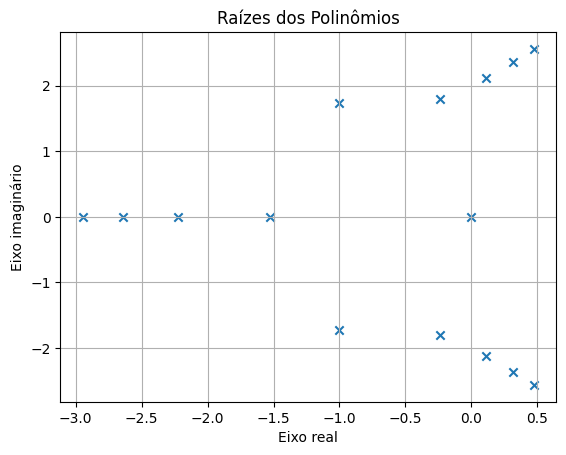

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definição dos valores de K
K = np.arange(0, 21, 5)  # [0:5:20] em MATLAB

# Inicialização de uma lista para armazenar as raízes
roots_list = []

# Cálculo das raízes para cada valor de K
for k in K:
    q = [1, 2, 4, k]
    roots = np.roots(q)
    roots_list.append(roots)

# Conversão da lista para um array numpy e separação das partes real e imaginária
roots_array = np.concatenate(roots_list)
real_parts = np.real(roots_array)
imaginary_parts = np.imag(roots_array)

# Plotagem das partes real e imaginária das raízes
plt.scatter(real_parts, imaginary_parts, marker='x')
plt.xlabel('Eixo real')
plt.ylabel('Eixo imaginário')
plt.grid(True)
plt.title('Raízes dos Polinômios')
plt.show()

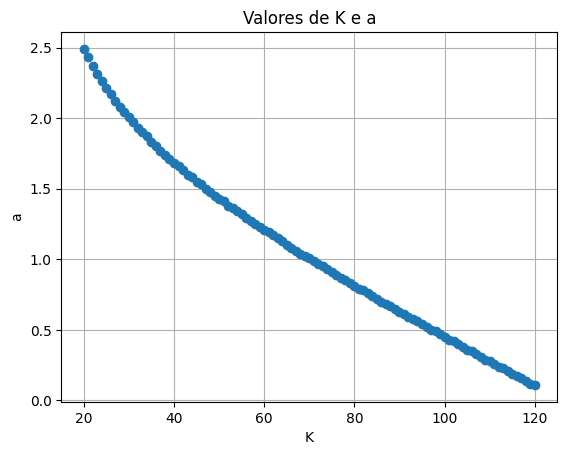

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definição dos intervalos de valores
a = np.arange(0.1, 3.01, 0.01)  # [0.1:0.01:3.0] em MATLAB
K = np.arange(20, 121, 1)       # [20:1:120] em MATLAB

# Inicialização dos vetores de resultados
X = np.zeros(len(K))
Y = np.zeros(len(K))

# Cálculo dos valores de X e Y
for i in range(len(K)):
    for j in range(len(a)):
        q = [1, 8, 17, K[i] + 10, K[i] * a[j]]
        p = np.roots(q)
        if np.max(np.real(p)) > 0:
            X[i] = K[i]
            Y[i] = a[j]
            break

# Plotagem dos resultados
plt.plot(X, Y, 'o')
plt.xlabel('K')
plt.ylabel('a')
plt.grid(True)
plt.title('Valores de K e a')
plt.show()

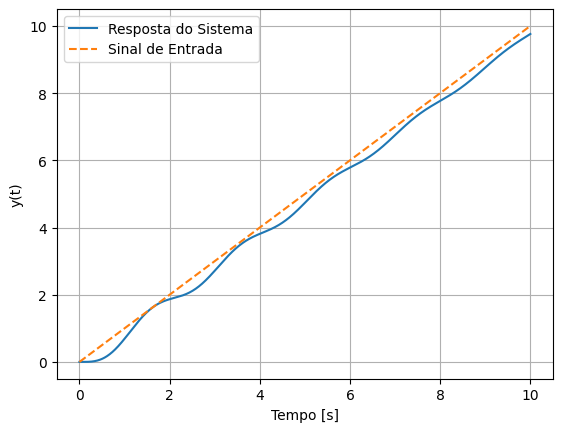

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

# Definição do vetor de tempo e sinal de entrada
t = np.arange(0, 10.01, 0.01)  # [0:0.01:10] em MATLAB
u = t

# Definição dos numeradores e denominadores das funções de transferência
numgc = [1, 0.6]
dengc = [1, 1]
numg = [70]
deng = [1, 7, 10, 0]

# Criação das funções de transferência
system_gc = ctl.tf(numgc, dengc)
system_g = ctl.tf(numg, deng)

# Combinação das funções de transferência em série
system_series = ctl.series(system_gc, system_g)

# Fechamento da malha
system_closed_loop = ctl.feedback(system_series)

# Simulação da resposta ao sinal de entrada
t, y = ctl.forced_response(system_closed_loop, T=t, U=u)

# Plotagem dos resultados
plt.plot(t, y, label='Resposta do Sistema')
plt.plot(t, u, label='Sinal de Entrada', linestyle='--')
plt.xlabel('Tempo [s]')
plt.ylabel('y(t)')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
import numpy as np

# Definindo a matriz A
A = np.array([[-8, -16, -6],
              [1, 0, 0],
              [0, 1, 0]])

# Obtendo o polinômio característico
p = np.poly(A)

# Encontrando as raízes do polinômio
r = np.roots(p)

print("Polinômio característico:", p)
print("Raízes do polinômio:", r)

Polinômio característico: [ 1.  8. 16.  6.]
Raízes do polinômio: [-5.0861302  -2.42800673 -0.48586307]


<ipython-input-30-1280a5f4d1bc>:13: RuntimeWarning: invalid value encountered in divide
  K = P * (P - 1) / (P - 1 - Z)


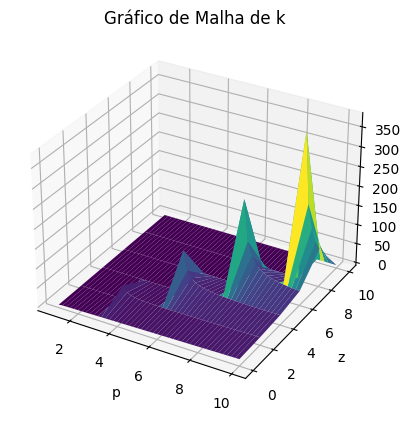

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definindo o intervalo dos valores de p e z
p = np.arange(1.0, 10.2, 0.2)
z = np.arange(0, 12, 2)

# Criando a grade de valores
P, Z = np.meshgrid(p, z)

# Calculando a matriz k
K = P * (P - 1) / (P - 1 - Z)

# Aplicando as condições
K[np.abs(Z - P + 1) < 1.0e-03] = 0
K[K < 0] = 0

# Criando o gráfico de malha
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# A ordem dos argumentos para plot_surface precisa ser consistente
X, Y = np.meshgrid(p, z)
ax.plot_surface(X, Y, K, cmap='viridis')

# Configurando os rótulos
ax.set_xlabel('p')
ax.set_ylabel('z')
ax.set_zlabel('k')
ax.set_title('Gráfico de Malha de k')

plt.show()

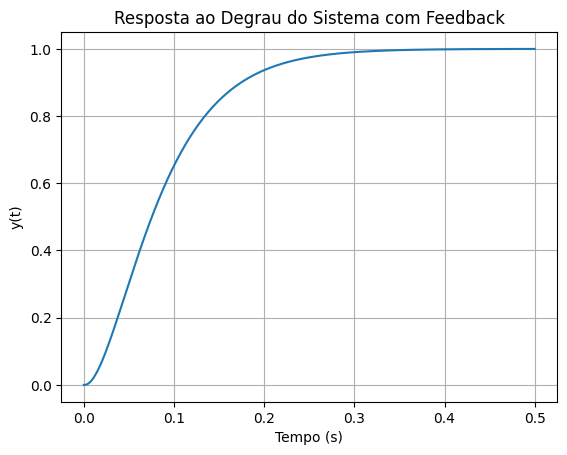

In [ ]:
import numpy as np
import control as ctl
import matplotlib.pyplot as plt

# Definindo os parâmetros
Ka = 100
K1 = 0.05

# Funções de transferência dos sistemas
ng1 = [5000]
dg1 = [1, 1000]
ng2 = [1]
dg2 = [1, 20, 0]
nc = [K1, 1]
dc = [0, 1]

# Criando as funções de transferência
sys1 = ctl.tf(Ka * np.array(ng1), np.array(dg1))
sys2 = ctl.tf(np.array(ng2), np.array(dg2))

# Sistema em série
series_sys = ctl.series(sys1, sys2)

# Sistema com feedback
closed_loop_sys = ctl.feedback(series_sys, ctl.tf(nc, dc))

# Tempo e resposta ao degrau
t = np.arange(0, 0.501, 0.001)
t, y = ctl.step_response(closed_loop_sys, t)

# Plotando a resposta ao degrau
plt.plot(t, y)
plt.grid(True)
plt.xlabel('Tempo (s)')
plt.ylabel('y(t)')
plt.title('Resposta ao Degrau do Sistema com Feedback')
plt.show()